# Roteiro Dirigido - Semana 4 - Michel B Fiorio

1. O que você entende por fuzificação de entradas reais?
**Resposta**: a fuzificação é o processo que transforma os conjuntos de dados crisps em dados fuzy através da aplicação de funções de pertinência que atribuem um grau de incerteza ao conjunto crisp. Os dados fuzificados permitem serem processados de maneira nebulosa nos processos seguintes.

2. Desenhe a forma de onda de 4 funções de pertinência que podem ser utilizadas nos processos de fuzificação de entradas.
**Resposta**:

In [27]:
# Importanto bibliotecas necessárias

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

import simpful as sf


Text(0, 0.5, 'Grau de pertinência')

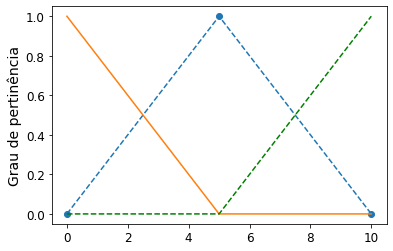

In [15]:
# Função de pertinência triangular

plt.plot([0, 5, 10], [0, 1, 0], "o--")
plt.plot([0,5,10], [1,0,0])
plt.plot([0,5,10], [0,0,1], "g--")
plt.ylabel("Grau de pertinência", fontsize=14)

Text(0, 0.5, 'Grau de pertinência')

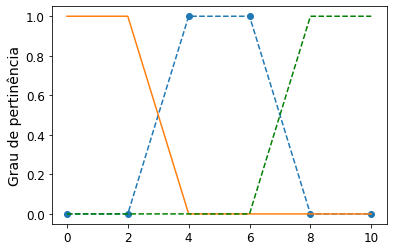

In [17]:
# Função de pertinência trapezoidal

plt.plot([0, 2, 4, 6, 8, 10], [0, 0, 1, 1, 0, 0], "o--")
plt.plot([0, 2, 4, 6, 8, 10], [1, 1, 0, 0, 0, 0])
plt.plot([0, 2, 4, 6, 8, 10], [0, 0, 0, 0, 1, 1], "g--")
plt.ylabel("Grau de pertinência", fontsize=14)

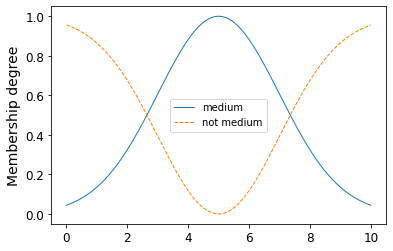

In [30]:
# Função de pertinência Gaussiana

G_1 = sf.GaussianFuzzySet(mu=5, sigma=2, term="medium")
G_2 = sf.InvGaussianFuzzySet(mu=5, sigma=2, term="not medium")
sf.LinguisticVariable([G_1, G_2], universe_of_discourse=[0, 10]).plot()

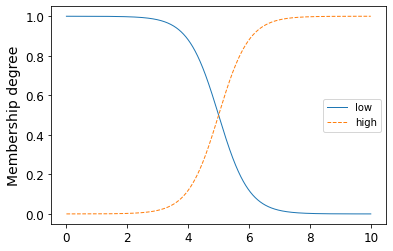

In [31]:
# Função de pertinência sigmoid

S_1 = sf.InvSigmoidFuzzySet(c=5, a=2, term="low")
S_2 = sf.SigmoidFuzzySet(c=5, a=2, term="high")
sf.LinguisticVariable([S_1, S_2], universe_of_discourse=[0, 10]).plot()

3. Como é feito a construção das regras de inferência dos sistemas baseados em lógica fuzzy?
**Resposta**: O objetivo das regras de inferência é descrever o comportamento do problema que está sendo modelado. As regras relacionam todas as variáveis linguisticas de entrada com as variáveis linguisticas de saída. A construção de uma regra deve obedecer a seguinte forma:

    SE *premissa* E *premissa* OU *premissa* ..., ENTÂO *consequência*

onde as premissas são as variáveis linguisticas de entrada e consequência a variável linguistica de saída.

4. No material disponibilizado na disciplina, apostila e aulas gravadas, foi construído um sistema de inferência fuzzy Mamdani para sugerir a gorjeta para garçons em um restaurante. Utilizando este sistema, calcule a saída para as entradas:
  1. Comida = 3 e Serviço = 8
  2. Comida = 8 e Serviço = 6
  3. É possível alcançar o valor máximo de gorjeta?

**Resposta**:

In [33]:
# Importanto bibliotecas necessárias

from simpful import *

In [34]:
# Criando um objeto Fuzzy

FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.9.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



In [88]:
# Definindo a variável linguistica de entrada "Service quality" e as funções de pertinência das premissas "poor", "good", "excelent".

S_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="poor") 
S_2 = FuzzySet(function=Triangular_MF(a=0, b=5, c=10), term="good")
S_3 = FuzzySet(function=Triangular_MF(a=5, b=10, c=10), term="excellent")
FS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality", universe_of_discourse=[0,10]))

In [36]:
# Definindo a variável linguistica de entrada "Food quality" e as funções de pertinência das premissas "rancid", "delicious".

F_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="rancid")
F_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=10), term="delicious")
FS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality", universe_of_discourse=[0,10]))

In [37]:
# Definindo a variável linguistica de saída "Tip" e as funções de pertinência das premissas "small", "average", "generous".

T_1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=10), term="small")
T_2 = FuzzySet(function=Triangular_MF(a=0, b=10, c=20), term="average")
T_3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=25, d=25), term="generous")
FS.add_linguistic_variable("Tip", LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0,25]))


In [38]:
# Definindo a base de regras
# 1. SE Serviço é Ruim E Comida é Ruim, ENTÃO Gorjeta(TIP) é Pequena
# 2. SE Serviço é Bom, ENTÃO Gorjerta é Média
# 3. SE Serviço é Excelente OU Comida é Deliciosa, ENTÃO Gorjeta é Generosa

R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS.add_rules([R1, R2, R3])

  1. Comida = 3 e Serviço = 8
  **Resposta**:

In [71]:
# Calculando a saída para a entrada: Comida = 3 e Serviço = 8

FS.set_variable("Service", 8)
FS.set_variable("Food", 3)

print(f"O valor da gorjeta será de {round(FS.Mamdani_inference()['Tip'],2)}% ")

O valor da gorjeta será de 14.64% 


  2. Comida = 8 e Serviço = 6
  **Resposta**:

In [70]:
# Calculando a saída para a entrada: Comida = 8 e Serviço = 6

FS.set_variable("Service", 6)
FS.set_variable("Food", 8)

print(f"O valor da gorjeta será de {round(FS.Mamdani_inference()['Tip'],2)}% ")

O valor da gorjeta será de 14.34% 


  3. É possível alcançar o valor máximo de gorjeta?
  **Resposta**: Conforme pode ser visto no código abaixo, foi simulado nota máxima para todas as entradas (Serviço e Comida) e o valor obtido para a saída Gorjeta foi de 19,59%. Portanto, a gorjeta máxima de 25% estipulada no modelo não pode ser alcançada.

In [92]:
# É possível atingir o valor máximo de gorjeta?

# Calculando a saída para a entrada: Comida = 10 e Serviço = 10

FS.set_variable("Service", 10)
FS.set_variable("Food", 10)

print(f"O valor da gorjeta será de {round(FS.Mamdani_inference()['Tip'],2)} % ")

O valor da gorjeta será de 19.59 % 


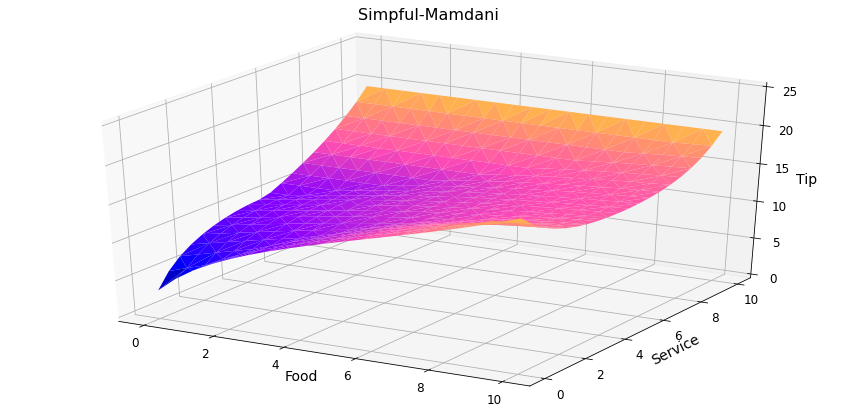

In [86]:
# Desenhando a superficie fuzzy do modelo com inferência Mandami

import matplotlib.pylab as pltpy
from mpl_toolkits.mplot3d import Axes3D

# Plotando a superficie
xs = []
ys = []
zs = []

for x in linspace(0,10,20):
	for y in linspace(0,10,20):
		FS.set_variable("Food", x)
		FS.set_variable("Service", y)
		tip = FS.inference()['Tip']
		xs.append(x)
		ys.append(y)
		zs.append(tip)
xs = array(xs)
ys = array(ys)
zs = array(zs)

fig = pltpy.figure(figsize=(12, 6))
fs_mam = fig.add_subplot(1,1,1, projection='3d')

xx, yy = pltpy.meshgrid(xs,ys)

fs_mam.plot_trisurf(xs,ys,zs, vmin=0, vmax=25, cmap='gnuplot2')
fs_mam.set_xlabel("Food")
fs_mam.set_ylabel("Service")
fs_mam.set_zlabel("Tip")
fs_mam.set_title("Simpful-Mamdani", fontsize=16, pad=20)
fs_mam.set_zlim(0, 25)
pltpy.tight_layout()

5. Implemente o exemplo da gorjeta para o garçom utilizando o método de inferência Takagi-Sugeno-Kang com as funções das regras propostas na atividade. Calcule a saída para as entradas do item 4. É possível alcançar o valor máximo de gorjeta neste tipo de inferência?
**Resposta**:

In [87]:
# Criando um objeto Fuzzy

FS_TS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.9.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



In [94]:
# Definindo a variável linguistica de entrada "Service quality" e as funções de pertinência das premissas "poor", "good", "excelent".

S_1 = FuzzySet(points=[[0., 1.],  [5., 0.]], term="poor")
S_2 = FuzzySet(points=[[0., 0.], [5., 1.], [10., 0.]], term="good")
S_3 = FuzzySet(points=[[5., 0.],  [10., 1.]], term="excellent")
FS_TS.add_linguistic_variable("Service", LinguisticVariable([S_1, S_2, S_3], concept="Service quality"))

In [95]:
# Definindo a variável linguistica de entrada "Food quality" e as funções de pertinência das premissas "rancid", "delicious".

F_1 = FuzzySet(points=[[0., 1.],  [10., 0.]], term="rancid")
F_2 = FuzzySet(points=[[0., 0.],  [10., 1.]], term="delicious")
FS_TS.add_linguistic_variable("Food", LinguisticVariable([F_1, F_2], concept="Food quality"))

In [96]:
# Definindo a variável linguistica de saída "Tip" e as funções das premissas "small", "average", "generous".

# Premissas "small" e "average" tem saídas definidas como constantes
FS_TS.set_crisp_output_value("small", 5)
FS_TS.set_crisp_output_value("average", 15)

# Premissa "generous" tem saída definida pela função: Food + Service + 5%
FS_TS.set_output_function("generous", "1*Food+1*Service+5")

 * Detected Sugeno model type


In [97]:
# Definindo a base de regras
# 1. SE Serviço é Ruim E Comida é Ruim, ENTÃO Gorjeta(TIP) é Pequena
# 2. SE Serviço é Bom, ENTÃO Gorjerta é Média
# 3. SE Serviço é Excelente OU Comida é Deliciosa, ENTÃO Gorjeta é Generosa

R1 = "IF (Service IS poor) AND (Food IS rancid) THEN (Tip IS small)"
R2 = "IF (Service IS good) THEN (Tip IS average)"
R3 = "IF (Service IS excellent) OR (Food IS delicious) THEN (Tip IS generous)"
FS_TS.add_rules([R1, R2, R3])

In [99]:
# Calculando a saída para a entrada: Comida = 3 e Serviço = 8

FS_TS.set_variable("Service", 8)
FS_TS.set_variable("Food", 3)

print(f"O valor da gorjeta será de {round(FS_TS.Sugeno_inference()['Tip'],2)}% ")

O valor da gorjeta será de 15.6% 


In [101]:
# Calculando a saída para a entrada: Comida = 8 e Serviço = 6

FS_TS.set_variable("Service", 6)
FS_TS.set_variable("Food", 8)

print(f"O valor da gorjeta será de {round(FS_TS.Sugeno_inference()['Tip'],2)}% ")

O valor da gorjeta será de 17.0% 


In [102]:
# É possível atingir o valor máximo de gorjeta?

# Calculando a saída para a entrada: Comida = 10 e Serviço = 10

FS_TS.set_variable("Service", 10)
FS_TS.set_variable("Food", 10)

print(f"O valor da gorjeta será de {round(FS_TS.Sugeno_inference()['Tip'],2)} % ")

O valor da gorjeta será de 25.0 % 


Conforme observamos, ao utilizar a inferência de Takani-Sugeno é possível alcançar a gorjeta máxima de 25% quando se aplica as notas máximas para as entradas Comida e Serviço. Veja a seguir a superfície fuzzy do modelo com inferência Sugeno.

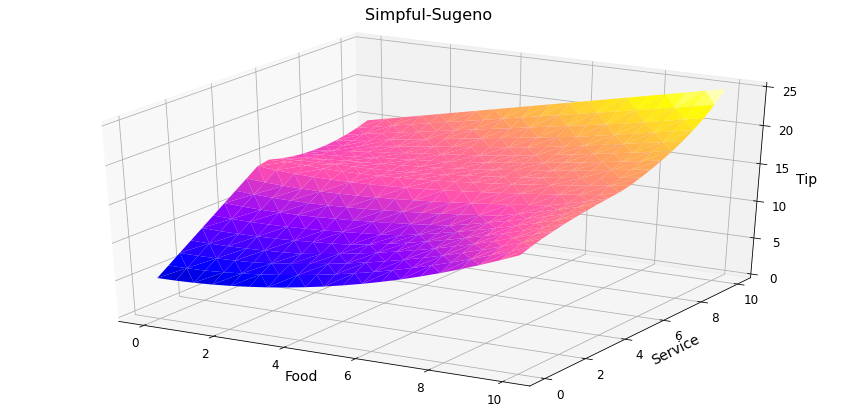

In [103]:
# Desenhando a superficie fuzzy do modelo com inferência Sugeno

import matplotlib.pylab as pltpy
from mpl_toolkits.mplot3d import Axes3D

# Plotando a superficie
xs = []
ys = []
zs_TS = []

for x in linspace(0,10,20):
	for y in linspace(0,10,20):
		FS_TS.set_variable("Food", x)
		FS_TS.set_variable("Service", y)
		tip = FS_TS.inference()['Tip']
		xs.append(x)
		ys.append(y)
		zs_TS.append(tip)
xs = array(xs)
ys = array(ys)
zs_TS = array(zs_TS)

fig = pltpy.figure(figsize=(12, 6))
fs_mam = fig.add_subplot(1,1,1, projection='3d')

xx, yy = pltpy.meshgrid(xs,ys)

fs_mam.plot_trisurf(xs,ys,zs_TS, vmin=0, vmax=25, cmap='gnuplot2')
fs_mam.set_xlabel("Food")
fs_mam.set_ylabel("Service")
fs_mam.set_zlabel("Tip")
fs_mam.set_title("Simpful-Sugeno", fontsize=16, pad=20)
fs_mam.set_zlim(0, 25)
pltpy.tight_layout()